In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install missingno
import missingno as msno
%pip install fancyimpute
from fancyimpute import IterativeImputer, KNN


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.3 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 21.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=854beaef845a43e8e2f8d58acefb4d3e6717159b32e56cc8004da3553bcd5212
  Stored in directory: /home/codespace/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpu

In [2]:
# Load the dataset
path = '/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv'
merged_data = pd.read_csv(path)
df_merged_data = pd.DataFrame(merged_data)
df_merged_data = df_merged_data.replace(to_replace=r'^NaN$', value=False, regex=True)
df_merged_data = merged_data.replace(to_replace=r'^-$', regex=True)

df_merged_data

,Datum,Inflationsrate,Heimspiel,Weihnachtsmarkt,Markt,Faehrverkaehr,Kreuzfahrverkehr,Temperatur,Monat,Jahreszeit,...,Sonnenaufgang,Sonnenuntergang,Tageslaenge,Niederschlag,Sonnenschein (h),Schneehoehe,Sonnenschein,Tageslaenge (dezimal),KielerWoche,Werktag
0,2013-07-01,1.53,0.0,0.0,0.0,1.576.718,419.447,17.8375,7.0,Sommer,...,4:50:12,21:56:46,17:06:34,0.3,6,-,0.350877,17.10,NaN,1
1,2013-07-01,1.53,0.0,0.0,0.0,1.576.718,419.447,17.8375,7.0,Sommer,...,4:50:12,21:56:46,17:06:34,0.3,6,-,0.350877,17.10,NaN,1
2,2013-07-01,1.53,0.0,0.0,0.0,1.576.718,419.447,17.8375,7.0,Sommer,...,4:50:12,21:56:46,17:06:34,0.3,6,-,0.350877,17.10,NaN,1
3,2013-07-01,1.53,0.0,0.0,0.0,1.576.718,419.447,17.8375,7.0,Sommer,...,4:50:12,21:56:46,17:06:34,0.3,6,-,0.350877,17.10,NaN,1
4,2013-07-01,1.53,0.0,0.0,0.0,1.576.718,419.447,17.8375,7.0,Sommer,...,4:50:12,21:56:46,17:06:34,0.3,6,-,0.350877,17.10,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,2019-07-27,NaN,1.0,0.0,0.0,NaN,NaN,23.5375,7.0,Sommer,...,5:23:29,21:28:35,16:05:06,0.0,-,-,0.000000,16.08,NaN,0
9733,2019-07-28,NaN,0.0,0.0,0.0,NaN,NaN,23.3500,7.0,Sommer,...,5:25:09,21:26:54,16:01:45,0.3,-,-,0.000000,16.02,NaN,0
9734,2019-07-29,NaN,0.0,0.0,0.0,NaN,NaN,25.2500,7.0,Sommer,...,5:26:49,21:25:10,15:58:21,2.1,-,-,0.000000,15.97,NaN,1
9735,2019-07-30,NaN,0.0,0.0,0.0,NaN,NaN,20.7375,7.0,Sommer,...,5:28:31,21:23:24,15:54:53,4.2,-,-,0.000000,15.90,NaN,1


### Visualization of Missing Data

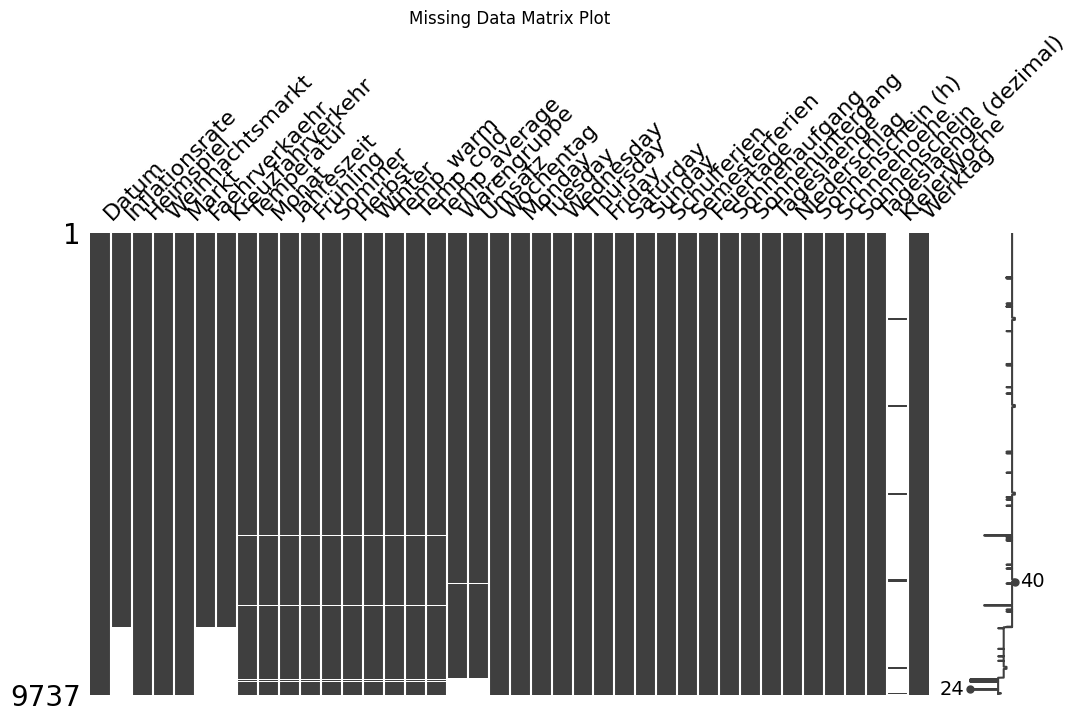

In [3]:
# Matrix plot of missing data
msno.matrix(df_merged_data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

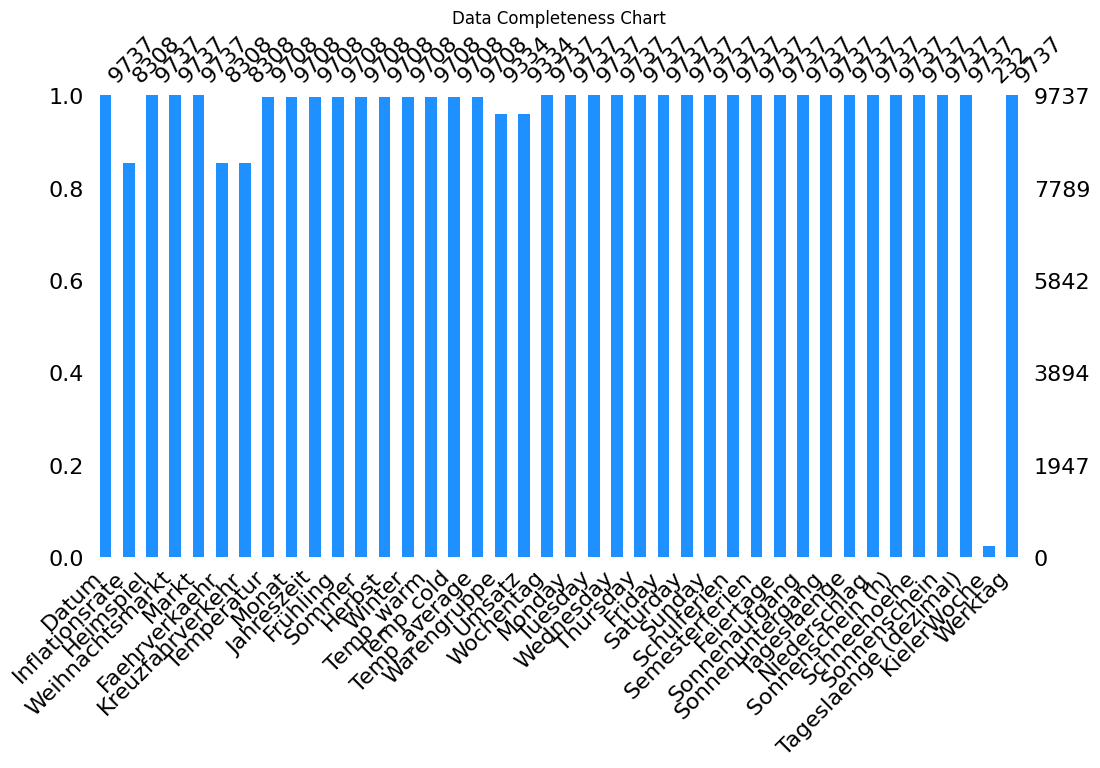

In [4]:
# Bar plot of complete data
msno.bar(df_merged_data, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

In [5]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(airquality)
plt.title('Missing Data Dendrogram')
plt.show()

NameError: name 'airquality' is not defined

### Imputation of Missing Data

In [6]:
# Create a mask for the imputed values
mask = airquality['Ozone'].isna()  # mask for missing values in 'Ozone'

NameError: name 'airquality' is not defined

In [19]:
# KNN imputation
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(airquality), columns=airquality.columns)


Imputing row 1/153 with 0 missing, elapsed time: 0.014
Imputing row 101/153 with 0 missing, elapsed time: 0.017


In [20]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(airquality), columns=airquality.columns)

### Visualization of Imputed Data

In [35]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


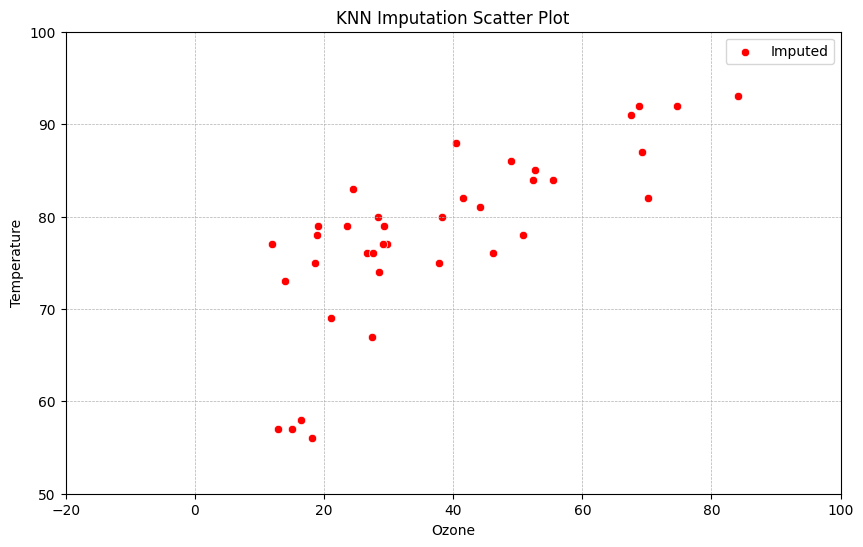

In [36]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(airquality, airquality_knn, 'Ozone', 'Temp', mask, 'KNN Imputation Scatter Plot', 'Ozone', 'Temperature')

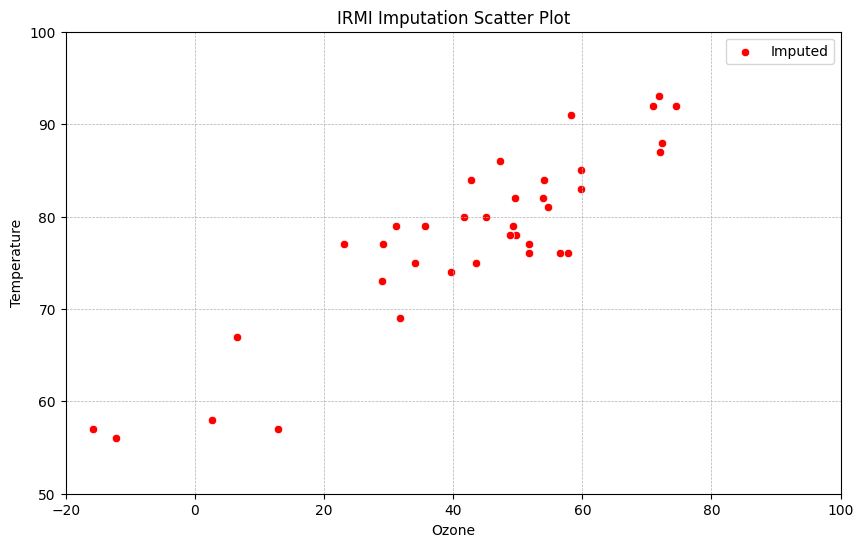

In [37]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality, airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

### Correlation Analysis

In [24]:
print("Correlation in original data:", airquality['Ozone'].corr(airquality['Temp'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Ozone'].corr(airquality_knn['Temp']))
print("Correlation after IRMI:", airquality_irmi['Ozone'].corr(airquality_irmi['Temp']))

Correlation in original data: 0.6983603421509318
Correlation after KNN imputation: 0.6938473095886781
Correlation after IRMI: 0.7251146461034882
